#Задача 2. Иду напролом
<img src="https://i.lensdump.com/i/AMp9Ib.gif"><br>
Представьте себе ситуацию: даны города, между некоторыми из которых проложены дороги, при этом, известны длины этих дорог. Нужно найти оптимальные расстояния между всеми парами городов - потому что иногда  выгоднее добираться из одного города в другой не напрямую, а через другие города.

Исходные данные задаются в виде матрицы A с размерами NxN. Элемент A[i][j] равен длине дороги между городом i и городом j, если она существует, и -1 в противном случае.

В результате программа должна выдать матрицу такой же формы, в которой в элементе A[i][j] будет содержаться длина оптимального пути между i и j.

Это классическая задача теории графов, которая решается алгоритмом Флойда. Вам нужно последовательно “разрешать” проходить через очередной город, сначала через первый, потом через второй, и так далее. Обратите внимание на сходство между умножением матриц и этим алгоритмом: должен получиться практически такой же код! Разница будет в том, что при умножении матриц вы складываете произведения A[i][k]*B[k][j], а в алгоритме Флойда вы выбираете минимум из A[i][j] и A[i][k]+A[k][j].

Результат: В этой задаче вам нужно написать программу, которая принимает двумерную матрицу A, у которой в элементе A[i][j] лежит расстояние между городами i и j либо -1, если прямого пути из i в j не существует. Программа должна выдавать матрицу кратчайшими путями между всеми вершинами в таком же виде.


###Пример входных данных:
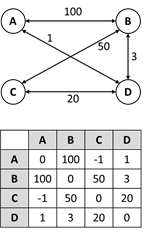

###Пример результата:

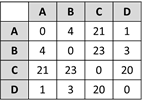

Время выполнения алгоритма Флойда-Уоршала $О (| V | ^ {3})$, V-количество вершин

In [ ]:
import numpy as np
import pandas as pd
import time 
start_time = time.time()
W = np.array([[0,100,-1,1],[100,0,50,3],[-1,50,0,20],[1,3,20,0]])
#W = np.where(W==-1, np.inf,W) 
W

array([[  0, 100,  -1,   1],
       [100,   0,  50,   3],
       [ -1,  50,   0,  20],
       [  1,   3,  20,   0]])

In [ ]:
W[0,0]

0

In [ ]:
def inf_if_negative(W):
    """Функция, заменяющая отрицательные значения
    в массиве numpy.ndarray на бесконечность (inf)
    """
    return np.where(W==-1, np.inf,W)

In [ ]:
W = inf_if_negative(W)
W

array([[  0., 100.,  inf,   1.],
       [100.,   0.,  50.,   3.],
       [ inf,  50.,   0.,  20.],
       [  1.,   3.,  20.,   0.]])

In [ ]:
def floyd_algorithm(W):
    """Алгоритм Флойда-Уоршелла — нахождениe самых коротких расстояний между
    всеми вершинами взвешенного графа без циклов с отрицательными весами,
    с использованием метода динамического программирования.

    Входные данные
    -----------
    W (numpy.ndarray) - матрица смежности графа(аdjacency matrix), np.inf указывает на отсутствие ребер между вершинами графа,
                       расстояние от вершины до самой себя - 0
    
    Результат
    -----------
    W (numpy.ndarray) - матрица кратчайших расстояний
    """
    
    n = W.shape[1]#-количество столбцов в матрице
    for k in range(n):
        for i in range(n):
            for j in range(n):
                W[i][j] = min(W[i][j], W[i][k] + W[k][j])
    # проверка на отрицательные циклы, выключена для сравнения времени работы с др алгоритмами
                # if i == j and W[i][j] < 0:
                #     return k, i,j,  'найден отрицательный цикл'
    return W

In [ ]:
floyd_algorith(W)

array([[ 0.,  4., 21.,  1.],
       [ 4.,  0., 23.,  3.],
       [21., 23.,  0., 20.],
       [ 1.,  3., 20.,  0.]])

In [ ]:
%timeit floyd_algorith(W)

10000 loops, best of 3: 97.9 µs per loop


In [ ]:
# Пример графа с отрицательным циклом
# Цикл - начинаем перемещение из некоторого узла, перемещаемся по графу и снова оказываемся в этом узле. Ненаправленный граф также является примером цикла
#            1 
#    (0)----------->(1) 
#    /|\               | 
#     |               | 
#  -1 |               | -1 
#     |                \|/ 
#    (3)<-----------(2) 
#        -1     '''         
  
graph_neg = np.array([ [0, 1, np.inf, np.inf], 
          [np.inf, 0, -1, np.inf], 
          [np.inf, np.inf, 0, -1], 
          [-1, np.inf, np.inf, 0]])

def floyd_algorithm_with_neg(W):
    """Алгоритм Флойда-Уоршелла — нахождениe самых коротких расстояний между
    всеми вершинами взвешенного графа без циклов с отрицательными весами,
    с использованием метода динамического программирования.

    Входные данные
    -----------
    W (numpy.ndarray) - матрица смежности графа(аdjacency matrix), np.inf указывает на отсутствие ребер между вершинами графа,
                       расстояние от вершины до самой себя - 0
    
    Результат
    -----------
    W (numpy.ndarray) - матрица кратчайших расстояний
    """
    
    n = W.shape[1]#-количество столбцов в матрице
    for k in range(n):
        for i in range(n):
            for j in range(n):
                W[i][j] = min(W[i][j], W[i][k] + W[k][j])
    # проверка на отрицательные циклы, выключена для сравнения времени работы с др алгоритмами
                if i == j and W[i][j] < 0:
                    return k, i,j,  'найден отрицательный цикл'
    return W

floyd_algorithm_with_neg(graph_neg)

(2, 3, 3, 'найден отрицательный цикл')

## Иные алгоритмы поиска оптимального пути|кратчайшего расстояния.

**Цель:** разобрать основные алгоритмы поиска кратчайшего пути. Их pros%cons


## 1. [Алгоритм Дейкстры](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)

<font color=red>Работает только с  ациклическими графами (DAG - Directed Acyclic Graph) у которых вес ребер положительный </font>

1. Изначально все вершины считаются непосещенными и расстояние до них счиется бесконечностью
2. Выбираем стартовую вершину для которой и будем искать оптимальные пути. Расстояние от вершины до самой себя принимаем за 0
1. От стартовой вершины графа проверяем расстояние до ее соседей, выбирает кратчайшее
2. Для вершины к которой идет кратчайшее ребро пересчитывает расстояние до соседей с учетом уже выбранного минимального и выбираем среди всех кратчайшее. Вершина, выбранная начальной, считается посещенной и больше не рассматривается в качестве начальной вершины повторяем шаг 2 пока не посетим все вершины графа

В простейшем случае, когда для поиска вершины с минимальным d[v] просматривается всё множество вершин, а для хранения величин d используется массив, время работы алгоритма есть **$ O(V^{2})$** для поиска расстояний.

Однако работа алгоритма может быть ускорена до $O (E + V*log V)$, V- вершины, E - ребра

In [ ]:
def Dijkstra(Node,w):
    
    
    """
    Алгоритм Дейкстры поиска кратчайшего пути от точки до других точек графа.
    Работает только с направленными ациклическими графами (DAG - Directed Acyclic Graph) у которых вес ребер положительный
    
    Входные данные:
    _ _ _ _ _ _ _ _
    Node (int)          - номер начального узла для анализа
    w (numpy.ndarray)   - матрица смежности графа(аdjacency matrix), np.inf указывает на отсутствие ребер между вершинами графа,
                          расстояние от вершины до самой себя - 0
    
    
    Результат:
    _ _ _ _ _ _ _ _
    dist (list)          -расстояния от заданной точки до остальных вершин графа, включая исходную,
                          индекс списка соответсвует индексу вершины
    """
    
    
    N = w.shape[0]
    INF = np.inf
    dist = np.array([INF] * N)
    dist[Node] = 0 # кратчайшее расстояние от вершины до самой себя 0
    used = [False] * N # список использованных вершин
    min_dist = 0
    min_vertex = Node 
    while min_dist < INF:
#     for z in range(N):
        i = min_vertex
        used[i] = True
        for j in range(N):
            if dist[i] + w[i][j] < dist[j]:
                dist[j] = dist[i] + w[i][j]
        min_dist = INF
        for j in range(N):
            if not used[j] and dist[j] < min_dist:
                min_dist = dist[j]
                min_vertex = j
    return dist
        
#Применяем алгоритм Дейкстеры ко всем точкам графа

def Dijkstra_for_all_vertex(matrix):
    """
    Применяет алгоритм Дейкстры ко всем вершинам графа
    
    Входные данные:
    _ _ _ _ _ _ _ _
    matrix(np.array) - матрица смежности графа(аdjacency matrix), np.inf указывает на отсутствие ребер между вершинами графа,
                       расстояние от вершины до самой себя - 0
                       
    Результат:
    _ _ _ _ _ _ _ _
    np.array - матрица кратчайших расстояний между вершинами графа
    
    """
    
    final_optimal_route_list = []
    for i in range(matrix.shape[0]):
        final_optimal_route_list.append(Dijkstra(i,matrix))
    return np.vstack(final_optimal_route_list)

Dijkstra_for_all_vertex(W)

array([[ 0.,  4., 21.,  1.],
       [ 4.,  0., 23.,  3.],
       [21., 23.,  0., 20.],
       [ 1.,  3., 20.,  0.]])

In [ ]:
%timeit Dijkstra_for_all_vertex(W)

10000 loops, best of 3: 97.2 µs per loop


**Вывод:** Алгоритм Дейкстры имеет время выполнения близкое к времени выполнения алгоритма Флойда-Уоршалла, что ожидаемо. Но стоит помнить про ограничения данного метода и возможность ускорения времени его работы.

## 2. [Поиск в ширину](https://ru.wikipedia.org/wiki/Поиск_в_ширину)
Позволяет определить есть ли путь из точки А в точку B. Если такой путь существует, то находит кратчайший путь (с минимальным количество сегментов)
Работает для невзвешенных ориентированных, неориентированных графов.

[Алгоритм построен на простой идее — пусть до какой-то вершины u найдено кратчайшее расстояние и оно равно d, а до вершины v кратчайшее расстояние не меньше, чем d. Тогда если вершины u и v – смежны, то кратчайшее расстояние до вершины v равно d+1.](https://foxford.ru/wiki/informatika/algoritm-poiska-v-shirinu)

**Время выполнения O(V+E),V-количество вершин E - количество ребер**


In [ ]:
#Уберем веса из исходного графа.
import numpy as np
W22 = np.array([ [0,1,1,0], 
                [0,0,1,0], 
                [0,0,0,1], 
                [0,0,0,0] ])

def matrix_to_list(matrix):
    """Функция для представления матрицы смежностей в виде списка смежностей
       Список смежности—один из способов представления графа в виде коллекции списков вершин, 
                        каждой вершине графа соответствует список, состоящий из «соседей» этой вершины
                        
       Входные данные:
       _ _ _ _ _ _ _ _
       matrix(np.array) - матрица смежности графа(аdjacency matrix), 0 указывает на отсутствие ребер между вершинами графа,
                          расстояние от вершины до самой себя - 0
                          
       Результат:
       _ _ _ _ _ _ _ _
       graph (dict) - список смежностей графа в виде словаря python
       
    """
                        
    graph = {}
    for i, node in enumerate(matrix): #цикл по строкам матрицы
        adj = []
        for j, connected in enumerate(node): #цикл по элементам строки матрицы
            if connected: # если сосед у вершины существует, то добавим ее номер в список
                adj.append(j)
        graph[i] = adj
    return graph

def bfs(graph_to_search, start, end):
    """Поиск в ширину (англ. breadth-first search, BFS) для поиска кратчайшего расстояния.
       Работает для невзвешенных ориентированных, неориентированных графов
       
       Входные данные:
       _ _ _ _ _ _ _ _
       graph_to_search(dict) - список смежностей графа в виде словаря python
       start(int) - номер стартовой вершины, начиная с 0
       end(int) - номер конечной вершины, до кот ищем кратчайшее расстояние
                          
       Результат:
       _ _ _ _ _ _ _ _
       int - кратчайшее расстояние, елси такого не существует, то возвращает np.inf"""
    queue = [[start]]
    visited = set()

    while queue:
        path = queue.pop(0)#берем первый элемент из очереди

        vertex = path[-1]#тк наша конструкция-это список списков, то берем последний элемент из списка, 
                         #он будет вершиной-соседом
#         print('1:',path,vertex)
        if vertex == end:#если данный элемент равен искомому, возвращаем path
            return len(path)-1 #рассчет расстояния, path - итоговый маршрут
        elif vertex not in visited: #проверяем был ли элемент в посщеенных
            #берем всех соседей текущей вершины и собираем новый путь и передаем в очередь
            for current_neighbour in graph_to_search.get(vertex, []):
                new_path = list(path)
                new_path.append(current_neighbour)
                queue.append(new_path)
#                 print('2:',current_neighbour,new_path,queue)
            visited.add(vertex) #отметка о посещении вершины
    return np.inf

def apply_bfs_for_all(graph_to_search):
    """
     Функция для применения bfs ко всем элементам матрицы

     Входные данные:
     _ _ _ _ _ _ _ _
     graph_to_search(dict) - список смежностей графа в виде словаря python

     Результат:
     _ _ _ _ _ _ _ _
     a (numpy.ndarray) - матрица с кратчайшими расстояниями 
  """
  
    #Создаем нулевую матрицу
    a = np.zeros((len(graph_to_search), len(graph_to_search)))
    #Применяем алгоритм ко всем элементам матрицы смежностей W2
    for i in range(len(graph_to_search)):
        for j in range(len(graph_to_search)):
            a[i][j] = bfs(graph_to_search, i, j)
    return a



In [ ]:
W22 = matrix_to_list(W22)
apply_bfs_for_all(W22)

array([[ 0.,  1.,  1.,  2.],
       [inf,  0.,  1.,  2.],
       [inf, inf,  0.,  1.],
       [inf, inf, inf,  0.]])

In [ ]:
%timeit apply_bfs_for_all(W22)

The slowest run took 44.61 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 26.5 µs per loop


**Вывод:** поиск в ширину для матрицы схожего размера, удовлятворяющей ограничениям, накладываемым алгоритмом работает еще быстрее, чем алгоритм Дейкстры или Флойда-Уоршала.

# 3. [Алгоритм Беллмана-Форда](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm)

Находит путь с наименьшей стоимостью от исходного узла до всех остальных узлов в графе (*тогда как Floyd-Warshall вычисляет кратчайшие пути от каждого узла до каждого другого узла*).
<p>Время выполнения при работе с матрицей смежности для расчета расстояния от одной до остальных вершин $ O (| V | *E)$  , где $ | V |,| E|$ -количество вершин и ребер соответственно.</p>

<p>Время выполнения для всех вершин $ O (| V | ^{2}*E)$  , где $ | V |$ -количество вершин и ребер соответственно.</p>

 Работа этого алгоритма похожа на алгоритм Флойда-Уоршелла, только последний решает более общую задачу.
Работает медленне Дейкстры. Однако в отличае от алгоритма Дейкстры может обрабатывать ребра с отрицательным весом.

Также как и алгоритм Флойда-Уоршалла имеет ограничения на отрицательные циклы


In [ ]:
def bellmanFord(source, weights):
    '''
    Функция принимает граф в виде матрицы и рассчитывает массивас информацией о кратчайшем пути
    https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm
    '''
    import numpy as np
    n = weights.shape[0]
    distance = np.empty(n)
    distance.fill(np.inf)      #В начале все вершины имеют вес бесконечности

    distance[source] = 0             # За исключением вершины-источника, где вес равен нулю

    # Релаксируем ребра 
    for _ in range(1, n):
        for (u, v), w in np.ndenumerate(weights):#номер строки матрицы, v номер столбца, w-сам элемент
            if distance[u] + w < distance[v]:#если предыдущее минимальное расстояние+новое ребро меньше, чем раст до этой вершины,
                distance[v] = distance[u] + w # обновляем

    # Поиск отрицательных циклов
    # for (u, v), w in np.ndenumerate(weights):
    #     if distance[u] + w < distance[v]:
    #         raise ValueError("Граф содержит отрицательный цикл")

    return distance


def apply_bellman_ford(matrix):
    l = []
    for i in range(4):
        l.append(list(bellmanFord(i, matrix)))
    a = np.vstack(l)
    return a
apply_bellman_ford(W)

array([[ 0.,  4., 21.,  1.],
       [ 4.,  0., 23.,  3.],
       [21., 23.,  0., 20.],
       [ 1.,  3., 20.,  0.]])

In [ ]:
%timeit apply_bellman_ford(W)

The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 213 µs per loop


In [ ]:
#Попытка ускорить работу функции bellmanFord
def bellman_ford_faster(adjacency_matrix, s):
    '''
    Функция принимает граф в виде матрицы и рассчитывает массив с информацией о кратчайшем пути
    https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm

    Входные данные:
    _ _ _ _ _ _ _ _
    adjacency_matrix (numpy.ndarray)   - матрица смежности графа(аdjacency matrix), np.inf указывает на отсутствие ребер между вершинами графа,
                                         расстояние от вершины до самой себя - 0
    s (int)                            - номер вершины для анализа
    
    Результат:
    _ _ _ _ _ _ _ _
    cache (list)          -расстояния от заданной точки до остальных вершин графа, включая исходную,
                          индекс списка соответсвует индексу вершины
    '''
    vertices = adjacency_matrix.shape[0]
    cache = np.empty(vertices)
    cache[:] = float("inf")
    cache[s] = 0
    # print('0',cache)
    for i in range(1, vertices):
        previous_cache = cache[:] 
        # print('1',previous_cache.T,adjacency_matrix,previous_cache.T + adjacency_matrix)   
        combined = np.min(previous_cache.T + adjacency_matrix,axis=1)#добавляем узлы к начальному и пресчитываем расстояния до точек
        cache = np.minimum(previous_cache, combined)
        # print('2',combined,previous_cache,cache)
    
    #Проверка на отрицательные циклы
    # previous_cache = cache[:]
    # combined = np.min(previous_cache.T + adjacency_matrix,axis=1)
    # cache = np.minimum(previous_cache, combined)
    
    # if(not np.alltrue(cache == previous_cache)):
    #     raise Exception("negative cycle detected")
    return cache
    
    

def apply_bellman_ford2(matrix):
    """
     Функция для применения алгоритма Бельмана-Форда ко всем строкам матрицы

     Входные данные:
     _ _ _ _ _ _ _ _
     matrix(numpy.ndarray) - матрица смежностей графа

     Результат:
     _ _ _ _ _ _ _ _
     a (numpy.ndarray) - матрица с кратчайшими расстояниями 
    """  
    l = []
    for i in range(4):
        l.append(list(bellman_ford_faster(matrix,i)))
    a = np.vstack(l)
    return a

apply_bellman_ford2(W)

array([[ 0.,  4., 21.,  1.],
       [ 4.,  0., 23.,  3.],
       [21., 23.,  0., 20.],
       [ 1.,  3., 20.,  0.]])

In [ ]:
%timeit apply_bellman_ford2(W)

10000 loops, best of 3: 138 µs per loop


**Вывод:** алгоритм Бельмана-Форда показал худший результат из всех возможных, что логично, тк время его выполенния зависит также и от количества ребер в графе. В нашем примере вершин -4, а ребер - 5. Поэтому время его выполнения выше, чем время выполнения Дейкстры или Флойда-Уоршалла

<h1><center>Сравнение алгоритмов поиска кратчайшего расстояния!</center><h1>

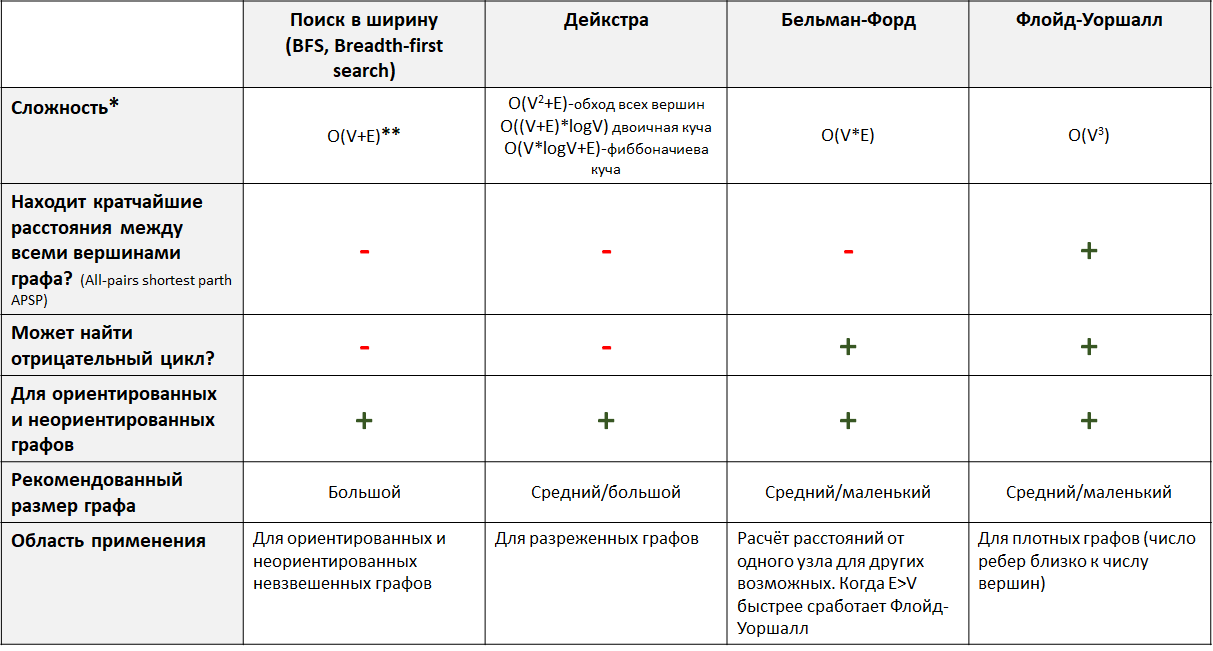
**\***  - для алгоритма Флойда-Уоршалла сложность указана для расчета расстояний всех вершин графа. Для остальных алгоритмов для одной вершины (для сравнением их сложности со сложностью Флойда-Уоршалла, необходимо первую домножить на V  количество вершин в графе )

**\**** - V-кол-во вершин, E-кол-во ребер